In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

FONTSIZE = 15

In [62]:
epochs1 = pd.read_csv(f"aggregation_eva_32batch_1epoch (1).txt")
epochs2 = pd.read_csv(f"aggregation_eva_32batch_2epoch (1).txt")
epochs3 = pd.read_csv(f"aggregation_eva_32batch_3epoch (1).txt")
#epochs4 = pd.read_csv(f"aggregation_eva_32batch_4epoch.txt")
epochs5 = pd.read_csv(f"aggregation_eva_32batch_5epoch (1).txt")

In [2]:
epochs1 = pd.read_csv(f"aggregation_eva_32batch_1epoch.txt")
epochs2 = pd.read_csv(f"aggregation_eva_32batch_2epoch.txt")
epochs3 = pd.read_csv(f"aggregation_eva_32batch_3epoch.txt")
#epochs4 = pd.read_csv(f"aggregation_eva_32batch_4epoch.txt")
epochs5 = pd.read_csv(f"aggregation_eva_32batch_5epoch.txt")

In [3]:
lista_dados = [epochs1,epochs2,epochs3,epochs5]

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

def plot_data(data ,metrica,y_label,ylim,legend_loc,intervalo_confianca=False, legend='',print_5_epochs=False):
    initial_data =  data
    partitions = np.array_split(data[metrica].values, 30)
    stacked_partitions = np.vstack(partitions)
    data = pd.Series(np.mean(stacked_partitions,axis=0))
    data_std = pd.Series(np.std(stacked_partitions,axis=0))
    data.index =  range(1, len(data) + 1)
    show_err = np.arange(2,20,1)
    y_show_err = list(map(lambda x: x - 1, show_err))
    data_std = data_std * 100 if all(item <=1 for item in data) else data_std
    data =  data*100 if all(item <=1 for item in data) else data    
    # if print_5_epochs==True:
    #     print('5epochs')
    #     print(data)
    plt.plot(data, label=legend)
    ci = 1.96 * data_std[y_show_err] / np.sqrt(stacked_partitions.shape[1])
    plt.errorbar(x=show_err, y=np.array(data)[y_show_err], yerr=ci, fmt="", ls="None",capsize=2,color='blue')

    plt.ylabel(f"{y_label}",fontsize = FONTSIZE)
    plt.xlabel("Rounds",fontsize = FONTSIZE)

    plt.xticks(list(range(1,21)),fontsize = FONTSIZE)
    plt.yticks(fontsize = FONTSIZE)
    plt.xlim([1,20])
    plt.ylim(ylim)
    plt.legend(loc=legend_loc, fontsize = 13)

In [5]:
def plot_metric(metrica,loc_zoom,zoom_size,zoom_area,y_label,ylim,markers,round_rule,legend_location):
    # Criar figura e eixos
    fig, ax = plt.subplots()
    epoch_count = 1
    for dado in lista_dados:
        epoch_str = str(epoch_count)+' Epoch' if epoch_count == 1 else str(epoch_count)+' Epochs'
        epoch_str = '5 Epochs' if epoch_count == 4 else epoch_str
        if epoch_count != 4:
            plot_data(dado,metrica,y_label,ylim,legend=epoch_str,legend_loc=legend_location)
        else:
            plot_data(dado,metrica,y_label,ylim,legend=epoch_str,legend_loc=legend_location,print_5_epochs=True)
        epoch_count+=1

    # Configurar a área ampliada
    axins = zoomed_inset_axes(ax,zoom_size,loc=loc_zoom)
    for dado in lista_dados:
        plot_data(dado,metrica,y_label,ylim,intervalo_confianca=True,legend_loc=legend_location)
        
    # Configurar limites da área ampliada
    x1, x2, y1, y2 = zoom_area # Definir os limites da área ampliada
    axins.set_xlim(x1, x2) # Limites do eixo x da área ampliada
    axins.set_ylim(y1, y2) # Limites do eixo y da área ampliada
    axins.set_title("")
    x_ticks = np.linspace(x1,x2,3)
    y_ticks = np.linspace(y1,y2,3)
    axins.set_yticks(np.round(y_ticks,round_rule))
    axins.tick_params(axis='y', which='both', length=5, width=1, direction='inout') # Tornar os ticks visíveis
    axins.set_xlabel("")
    axins.set_ylabel("")
    # Adicionar linhas para indicar a área ampliada
    loc1,loc2 = markers
    mark_inset(ax, axins, loc1=1, loc2=2,fc="none", ec="0.5")

    # Exibir figura
    fig.set_size_inches(12,5)
    formato = ".pdf"
    save_file_str =  "".join([metrica,formato])
    fig.savefig(save_file_str)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


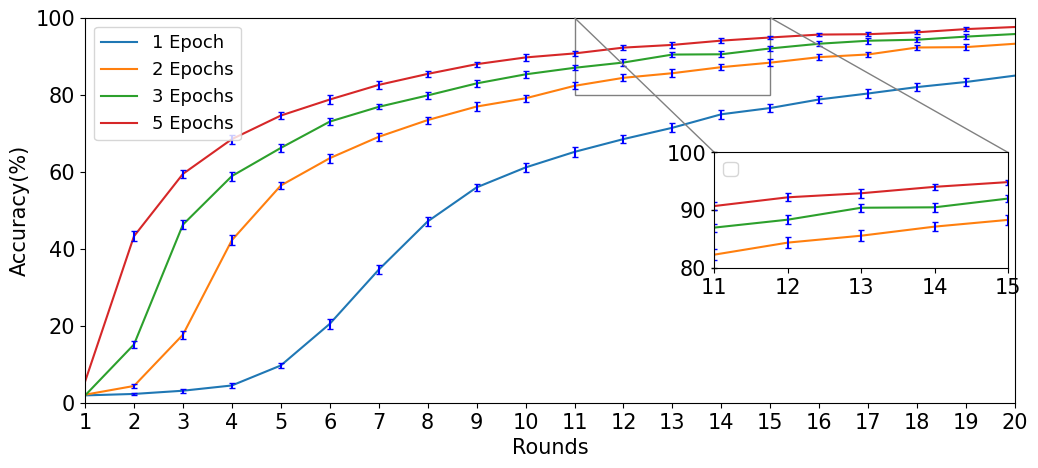

In [6]:
plot_metric('accuracy','center right',1.5,[11,15,80,100],y_label="Accuracy(%)",ylim=(0,100),markers=[1,2],round_rule=1,legend_location='upper left')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


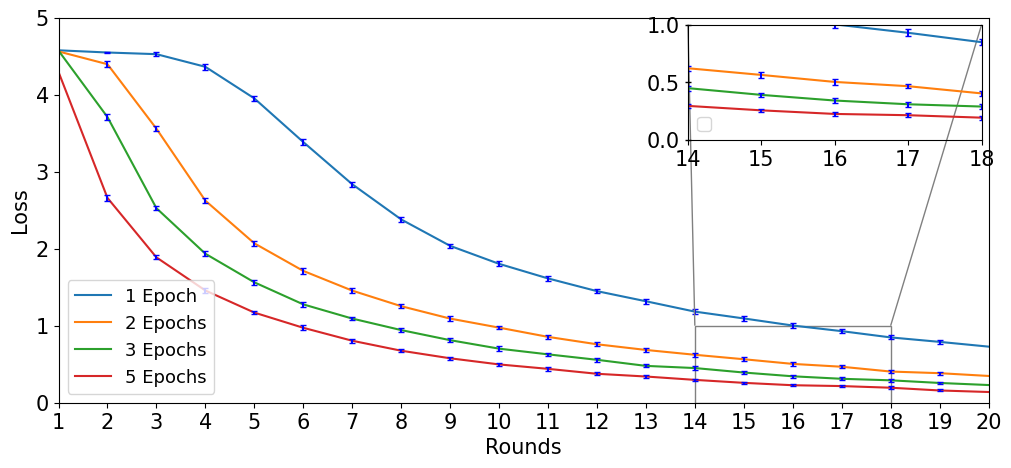

In [7]:
plot_metric('loss','upper right',1.5,[14,18,0,1],y_label="Loss",ylim=(0,5),markers=[4,3],round_rule=1,legend_location='lower left')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


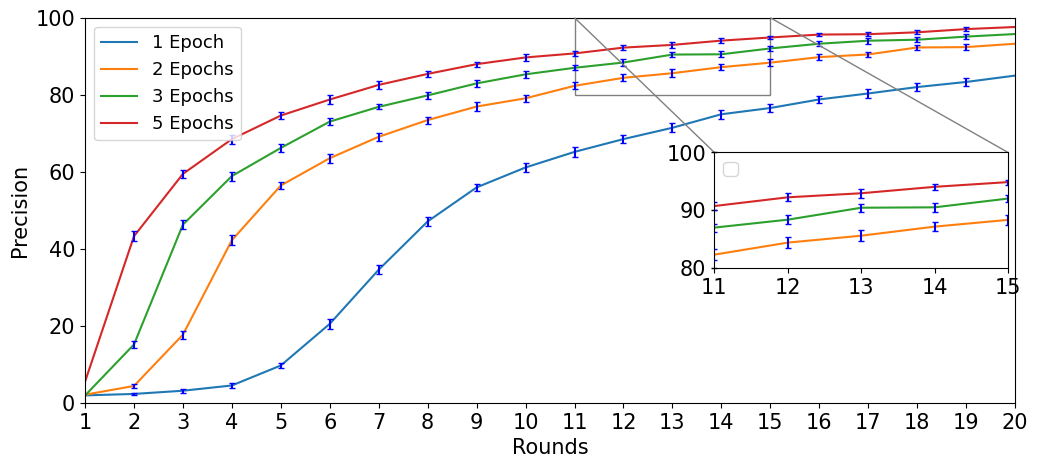

In [8]:
plot_metric('precision','center right',1.5,[11,15,80,100],y_label="Precision",ylim=(0,100),markers=[1,2],round_rule=1,legend_location='upper left')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


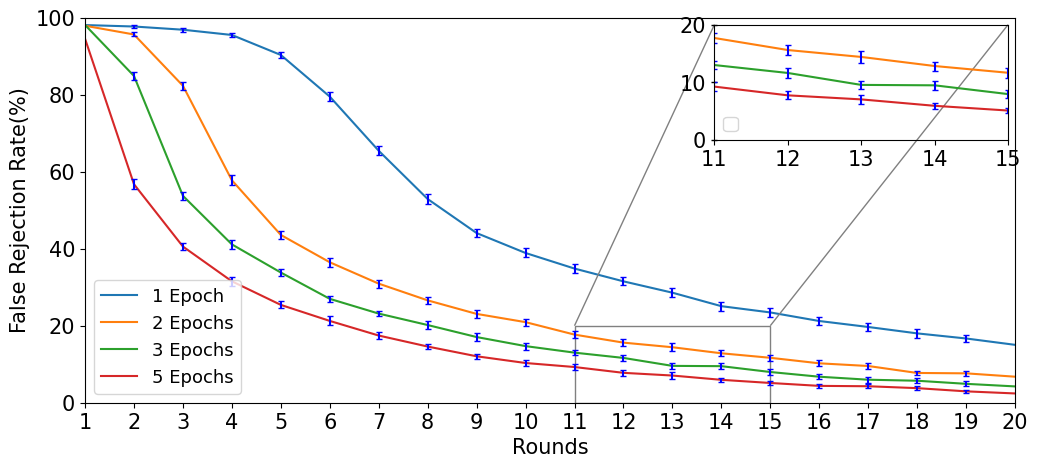

In [9]:
plot_metric('frr','upper right',1.5,[11,15,0,20],y_label="False Rejection Rate(%)",ylim=(0,100),markers=[1,2],round_rule=1,legend_location='lower left')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


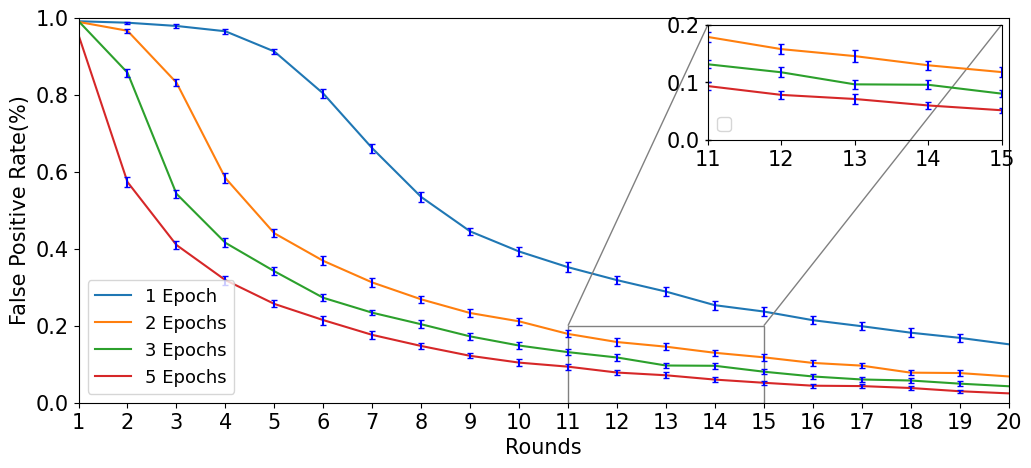

In [10]:
plot_metric('fpr','upper right',1.5,[11,15,0,0.2],y_label="False Positive Rate(%)",ylim=(0,1),markers=[3,4],round_rule=3,legend_location='lower left')

In [52]:
dado_juntado_2 = pd.read_csv(f"aggregation_eva_32batch_5epoch_2.txt")

In [ ]:
data_list_2 = []
for key, data in dado_juntado_2.groupby(by='nn'):
    data.index = range(1,21)
    data['accuracy'] =  data['accuracy']*100
    data_list_2.append(data)
    print("dados_2: ", key)
print("quantidade de dados no dataset: ", len(dado_juntado_2))

In [ ]:
plt.plot(data_list_2[0]['accuracy'],label=data_list_2[0].at[1,'nn'])
plt.plot(data_list_2[1]['accuracy'],label =data_list_2[1].at[1,'nn'])
plt.plot(data_list_2[2]['accuracy'],label =data_list_2[2].at[1,'nn'])
plt.plot(data_list_2[3]['accuracy'],label =data_list_2[3].at[1,'nn'])
plt.plot(data_list_2[4]['accuracy'],label =data_list_2[4].at[1,'nn'])
plt.plot(data_list_2[5]['accuracy'],label =data_list_2[5].at[1,'nn'])

plt.ylabel(f"Accuracy (%)",fontsize = FONTSIZE)
plt.xlabel("Rounds",fontsize = FONTSIZE)
x_ticks = [1].append(range(2,21,2))
plt.xticks([1,2,4,6,8,10,12,14,16,18,20],fontsize = FONTSIZE)
plt.yticks(fontsize = FONTSIZE)
plt.xlim([1,20])
plt.ylim([0,100])
plt.legend(fontsize=FONTSIZE)
plt.savefig("cnns.pdf")

In [123]:
fpr_cen=  [0.0003410774410774411, 0.0004959595959595959, 8.956228956228956e-05, 0.0006087542087542088, 0.0002777777777777778, 0.0001632996632996633, 0.0011629629629629629, 0.0006090909090909091, 0.0003501683501683502, 0.002236363636363636]
frr_cen =  [0.03376666666666667, 0.0491, 0.008866666666666667, 0.06026666666666667, 0.0275, 0.016166666666666666, 0.11513333333333334, 0.0603, 0.034666666666666665, 0.2214]
loss_cen =  [0.14445678889751434, 0.21514855325222015, 0.05721369758248329, 0.23777584731578827, 0.1507878601551056, 0.10105620324611664, 0.39472609758377075, 0.2367420792579651, 0.14890727400779724, 0.8419489860534668]
accuracy_cen = [0.9662333333333334, 0.9509, 0.9911333333333333, 0.9397333333333333, 0.9725, 0.9838333333333333, 0.8848666666666667, 0.9397, 0.9653333333333334, 0.7786]
desvio_fpr_cen =  0.0006065402750156175
desvio_frr_cen =  0.060047487226546147
desvio_loss_cen =  0.21525782406692237
desvio_accuracy_cen = 0.06004748722654616

In [175]:
def plot_centralizados(data,desvio,ylabel,xlim,ylim,zoom_loc,zoom_area,save_str,multiply=1):
    data = [x*multiply for x in data]
    desvio = multiply * desvio
    xl1,xl2 = xlim
    yl1,yl2 = ylim  
    # Crie uma figura e um eixo
    fig, ax = plt.subplots()
    # Crie um gráfico de linha com pontos
    ax.plot(range(len(data)), data, '-o', label='Centralized')
    # Adicione as barras de erro
    ax.errorbar(range(len(data)), data, yerr=desvio, fmt='none', ecolor='black', capsize=3)
    # Adicione títulos e legendas
    ax.set_title('')
    ax.set_xticks(ticks=range(xl1,xl2+1,1),labels=list(str(x) for x in range(xl1+1,xl2+2,1)))
    ax.set_xlabel('Rounds')
    ax.set_ylabel(ylabel=ylabel)
    ax.legend()
    ax.set_xlim(xl1,xl2)
    ax.set_ylim(yl1,yl2+desvio)

    # # Adicione o gráfico de zoom
    # x1, x2, y1, y2 = zoom_area
    # axins = zoomed_inset_axes(ax, zoom=1.5, loc=zoom_loc)
    # axins.set_xlim(x1, x2) # Limites do eixo x da área ampliada
    # axins.set_ylim(y1, y2+desvio) # Limites do eixo y da área ampliada
    # x_ticks = np.linspace(x1,x2,3)
    # y_ticks = np.linspace(y1,y2,3)
    # axins.set_title("")
    # axins.set_yticks(np.round(y_ticks,3))
    # axins.tick_params(axis='y', which='both', length=5, width=1, direction='inout')
    # axins.set_xlabel("")
    # axins.set_ylabel("")
    # axins.plot(range(x1,x2+1), data[x1:x2+1], '-o')
    # axins.errorbar(range(x1,x2+1), data[x1:x2+1], yerr=desvio, fmt='none', ecolor='black',capsize=3)
    # mark_inset(ax, axins, loc1=1, loc2=2,fc="none", ec="0.5")

    fig.set_size_inches(8,5)
    fig.savefig(save_str)


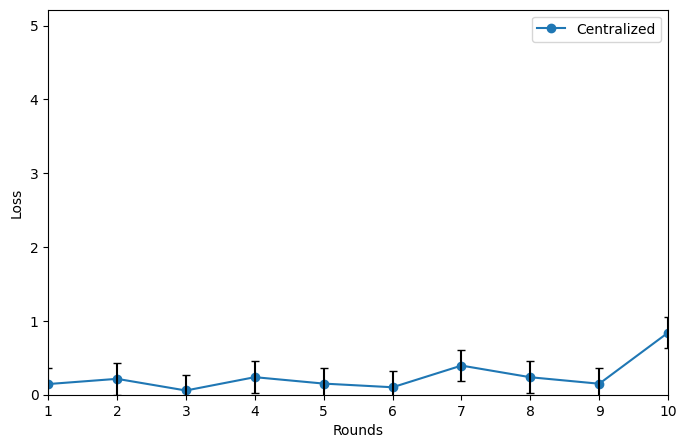

In [176]:
plot_centralizados(data=loss_cen,desvio=desvio_loss_cen,ylabel='Loss',xlim=(0,9),ylim=(0,5),zoom_loc='center',zoom_area=[3,6,0,1],multiply=1,save_str='loss_cen.pdf')

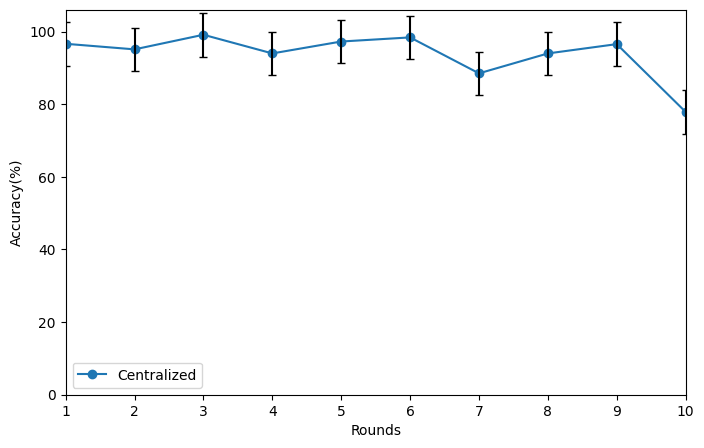

In [177]:
plot_centralizados(data=accuracy_cen,desvio=desvio_accuracy_cen,ylabel='Accuracy(%)',xlim=(0,9),ylim=(0,100),zoom_loc='center',zoom_area=[3,6,80,100],multiply=100,save_str='accuracy_cen.pdf')

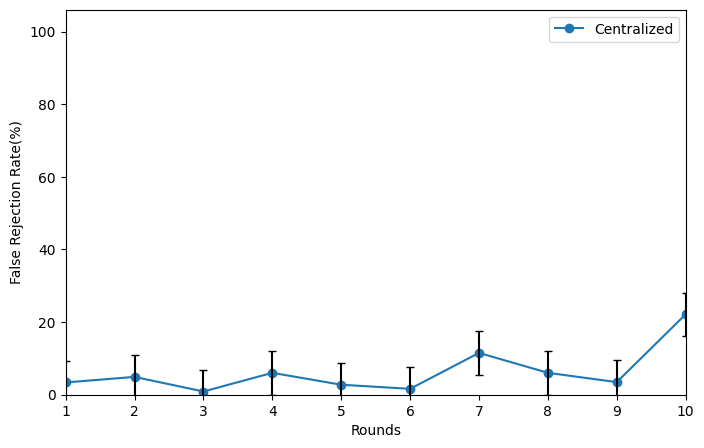

In [178]:
plot_centralizados(data=frr_cen,desvio=desvio_frr_cen,ylabel='False Rejection Rate(%)',xlim=(0,9),ylim=(0,100),zoom_loc='center',zoom_area=[3,6,0,15],multiply=100,save_str='frr_cen.pdf')

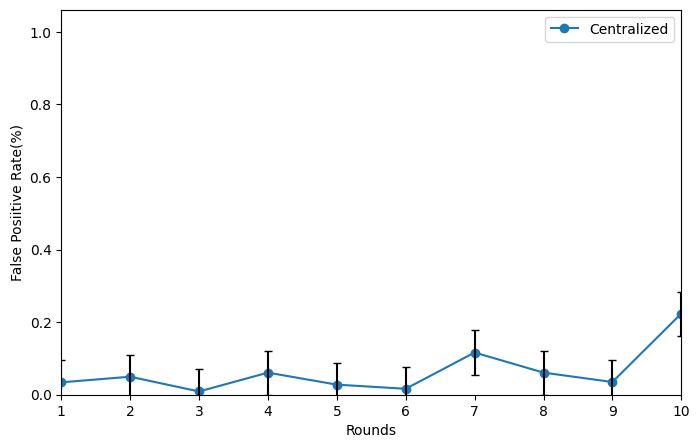

In [179]:
plot_centralizados(data=fpr_cen,desvio=desvio_fpr_cen,ylabel='False Posiitive Rate(%)',xlim=(0,9),ylim=(0,1),zoom_loc='center',zoom_area=[3,6,0,0.2],multiply=100,save_str='fpr_cen.pdf')